In [ ]:
!pip install yfinance
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import math

     |████████████████████████████████| 63 kB 1.0 MB/s 
     |████████████████████████████████| 6.4 MB 12.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
apple = yf.Ticker("AAPL")

# returns the historical data of the stock during the specified time
data = apple.history("AAPL", start="2010-01-01", end="2019-01-01")
print(data)
print(len(data))

                 Open       High        Low      Close     Volume  Dividends  \
Date                                                                           
2010-01-04   6.526950   6.559672   6.494839   6.544687  493729600        0.0   
2010-01-05   6.562730   6.593005   6.521445   6.556002  601904800        0.0   
2010-01-06   6.556003   6.581997   6.444993   6.451721  552160000        0.0   
2010-01-07   6.475573   6.483219   6.393004   6.439793  477131200        0.0   
2010-01-08   6.431230   6.483219   6.393311   6.482607  447610800        0.0   
...               ...        ...        ...        ...        ...        ...   
2018-12-24  35.909417  36.733530  35.531296  35.589470  148676800        0.0   
2018-12-26  35.945772  38.110272  35.562802  38.095730  234330000        0.0   
2018-12-27  37.773364  37.998785  36.374802  37.848503  212468400        0.0   
2018-12-28  38.175728  38.422962  37.460691  37.867897  169165600        0.0   
2018-12-31  38.425381  38.626562  37.928

In [ ]:
# we make the date as a column in the dataset
newdf = data.reset_index()
newdf.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

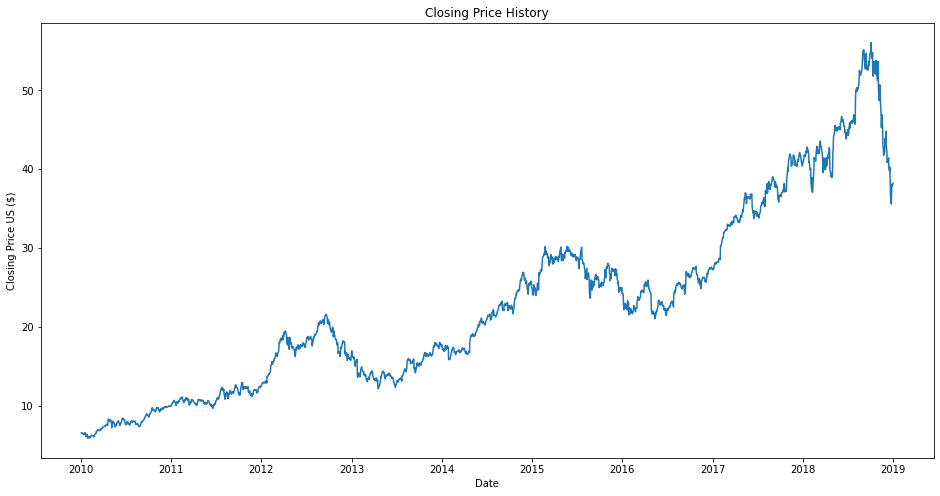

In [ ]:
# visualise the entire dataset Date vs Closing Price
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(data['Close'])
plt.xlabel("Date")
plt.ylabel('Closing Price US ($)')
plt.show()

In [ ]:
# imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [ ]:
# gets the closing price from the dataset
closing_data_frame = data.filter(['Close'])

# convert to numpy arr
dataset = closing_data_frame.values

# we take 80% of the data points as the training dataset and the rest 20 % as the testing dataset
# we need the length to divide into the training and testing dataset
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1812

In [ ]:
# Scaling the data so that the values range between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
new_scaled_data = scaler.fit_transform(dataset)
new_scaled_data

array([[0.01338259],
       [0.01360804],
       [0.01153   ],
       ...,
       [0.63719191],
       [0.63757831],
       [0.64487183]])

In [ ]:
#create the scaled dataset
train_data = new_scaled_data[0:training_data_len,:]

# split the data into train_x and train_y
train_x= []
train_y = []
 
for i in range(60, len(train_data)): # change 
    train_x.append(train_data[i-60:i,0])
    train_y .append(train_data[i,0])

In [ ]:
#convert to numpy arrays
train_x, train_y = np.array(train_x), np.array(train_y)

In [ ]:
# reshape the array
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1],1))
train_x.shape
print(train_x.shape)

(1752, 60, 1)


In [ ]:
#build the LSTM model
lstmModel = Sequential() 
lstmModel.add(LSTM(50, return_sequences=True, input_shape=(train_x.shape[1], 1)))
lstmModel.add(LSTM(50, return_sequences=False))
lstmModel.add(Dense(25))
lstmModel.add(Dense(1))

In [ ]:
#Compile the model
lstmModel.compile(optimizer ='adam', loss='mean_squared_error')

In [ ]:
#Train the model
lstmModel.fit(train_x, train_y, batch_size=1,  epochs=1)

1752/1752 [==============================] - 64s 34ms/step - loss: 6.5214e-04


In [ ]:
#create the testing dataset
#scale the dataset
test_data = new_scaled_data[training_data_len-60:,:]
test_x= []
test_y = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    test_x.append(test_data[i-60:i,0])
    

In [ ]:
# Convert to numpy array
test_x = np.array(test_x)
print(test_x)

[[0.42609673 0.42923466 0.43068652 ... 0.53771874 0.53673081 0.54364516]
 [0.42923466 0.43068652 0.43120166 ... 0.53673081 0.54364516 0.54472704]
 [0.43068652 0.43120166 0.42759545 ... 0.54364516 0.54472704 0.54143464]
 ...
 [0.97684752 0.98657056 1.         ... 0.61101233 0.59217485 0.64211869]
 [0.98657056 1.         0.98036144 ... 0.59217485 0.64211869 0.63719191]
 [1.         0.98036144 0.96255194 ... 0.64211869 0.63719191 0.63757831]]


In [ ]:
#Reshape the data
text_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1],1))

In [ ]:
#predict the data
predictions = lstmModel.predict(test_x) 
predictions = scaler.inverse_transform(predictions)
predict = lstmModel.predict()

In [ ]:
# Calculate the RMSE and MAPE
rmse = mean_squared_error(test_y, predictions, squared=False)
mape = mean_absolute_percentage_error(test_y, predictions)
print(rmse)
print(mape)
rmse = np.sqrt(np.mean(predictions- test_y)**2 )
print(rmse)

1.3127885970852626
0.023433925473486737
0.5286516932259618


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


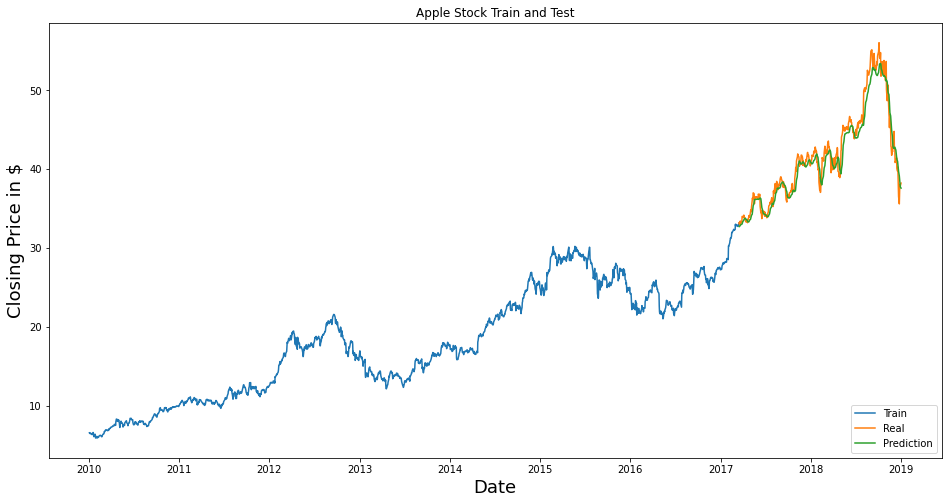

In [ ]:
train = data[:training_data_len]
train_new = train['Close']
#print(train)
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize =(16,8))
plt.title('Apple Stock Train and Test')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price in $', fontsize=18)
plt.plot(train_new)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Real','Prediction'], loc='lower right')
plt.show()

In [ ]:
valid 

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Predictions
Date,,,,,,,,
2017-03-16,33.215539,33.286352,33.106959,33.208458,76928000,0.0,0.0,32.713650
2017-03-17,33.281639,33.281639,33.019634,33.043240,175540000,0.0,0.0,32.765606
2017-03-20,33.140011,33.399657,33.099885,33.390217,86168000,0.0,0.0,32.804546
2017-03-21,33.543639,33.706508,32.981863,33.007828,158119600,0.0,0.0,32.868206
2017-03-22,33.010198,33.423268,32.988952,33.380779,103440800,0.0,0.0,32.899227
...,...,...,...,...,...,...,...,...
2018-12-24,35.909417,36.733530,35.531296,35.589470,148676800,0.0,0.0,39.149277
2018-12-26,35.945779,38.110280,35.562809,38.095737,234330000,0.0,0.0,38.461483
2018-12-27,37.773364,37.998785,36.374802,37.848503,212468400,0.0,0.0,38.038696


Text(0.5, 1.0, 'Plot of Residuals for Apple Stock')

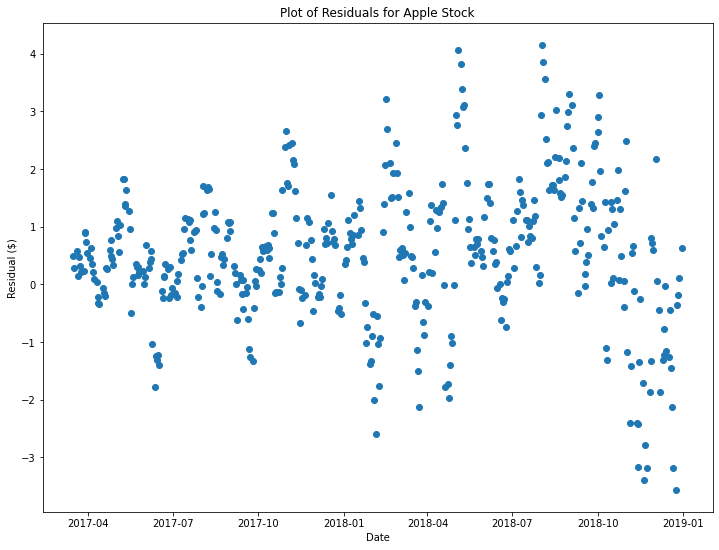

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(newdf['Date'][training_data_len: training_data_len + valid.size], valid['Close'] - valid['Predictions'])
plt.xlabel("Date")
plt.ylabel("Residual ($)")
plt.title("Plot of Residuals for Apple Stock")

In [ ]:
train_data = new_scaled_data[0:training_data_len,:]

#Function that creates Training data 

def train(n):          
    toReturn = []
    train_x= []
    train_y = []
    for i in range(n, len(train_data)):
        train_x.append(train_data[i-n:i,0])
        train_y .append(train_data[i,0])
    train_x, train_y = np.array(train_x), np.array(train_y)
    train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1],1))
    lstmModel = Sequential() 
    lstmModel.add(LSTM(50, return_sequences=True, input_shape=(train_x.shape[1], 1)))
    lstmModel.add(LSTM(50, return_sequences=False)) 
    lstmModel.add(Dense(25))
    lstmModel.add(Dense(1))
    lstmModel.compile(optimizer ='adam', loss='mean_squared_error')
    lstmModel.fit(train_x, train_y, batch_size=1,  epochs=1)
    test_data = new_scaled_data[training_data_len-n:,:]
    test_x= []
    test_y = dataset[training_data_len:, :]
    for i in range(n, len(test_data)):
        test_x.append(test_data[i-n:i,0])
    test_x = np.array(test_x)
    text_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1],1))
    predictions = lstmModel.predict(test_x) 
    predictions = scaler.inverse_transform(predictions) 
    rmse = np.sqrt(np.mean(predictions- test_y)**2)
    #rmse = mean_squared_error(test_y, predictions, squared=False)
    #mape = mean_absolute_percentage_error(test_y, predictions)
    return rmse


In [ ]:
# Testing for 20 iterations
random = []
for i in range(1,20):
  m = train(60)
  random.append(m)
print(random)

 703/1752 [===========>..................] - ETA: 36s - loss: 7.6272e-04

KeyboardInterrupt: ignored

In [ ]:
# Testing
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)

In [ ]:
# Testing
print(random)
random1 = []
for i in range(1,20):
  m = train(60)
  random1.append(m)
print(random1)

In [ ]:
# testing
from numpy.random import seed
seed(42)
import tensorflow as tf
tf.random.set_seed(43)

In [ ]:
# testing
print(random)
random2 = []
for i in range(1,20):
  m = train(60)
  random2.append(m)
print(random2)

In [ ]:
# accuracy graph
x = []
y = []
print(x)
plt.figure(figsize=(12, 9))
prices = valid['Close']
right = 0
wrong = 0
for i in range(0, prices.size):
    xadd = valid.iloc[i]['Close'] - valid.iloc[i-1]['Close']
    x.append(xadd)
    yadd = valid.iloc[i]['Predictions'] - valid.iloc[i-1]['Predictions']
    y.append(yadd)
    if (((xadd > 0) and (yadd > 0)) or ((xadd < 0) and (yadd < 0))):
        right = right + 1
    else:
        wrong = wrong + 1
plt.scatter(newdf['Date'][training_data_len: training_data_len + valid.size], x)
plt.scatter(newdf['Date'][training_data_len: training_data_len + valid.size], y)

print(right)
print(wrong)



In [ ]:
# % accuracy calculation
plt.figure(figsize=(8, 6))
plt.bar(['Predicted Correctly', 'Predicted Incorrectly'], [right, wrong])
plt.title('Correctness of Prediction for Increase or Decrease of Tesla Stock Price')
plt.ylabel('Frequency')
pctAccuracy = right / (right + wrong)
print(pctAccuracy)